# Capítulo 3: Modulaciones de Orden Superior 
### QAM (QUADRATURE AMPLITUDE MODULATION)
La modulación QAM hace uso de la variación de la amplitid y de la fase de la portadora

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import komm

np.random.seed(40)

def x_t(simbols,tS,fc=1):
    t_c = np.arange(0,tS,1/fs)
    
    tf = tS*len(simbols)
    t = np.arange(0,tf,1/fs)

    x = np.cos(2*np.pi*t_c*fc)
    y = np.sin(2*np.pi*t_c*fc)
    
    fm = np.array([])

    for i in simbols:
        fm = np.append(fm, i.real*x-i.imag*y) 
    return t,fm

def combin(bits): 
    x = np.zeros((2**bits, bits))
    for i in range(x.shape[0]):
        b_ = bin(i)[2:]
        for j in range(len(b_)):
            x[i,x.shape[1]-len(b_)+j] = int(b_[j])
    return x 

def raisedCosinePulse(roll_off,span):
    t = np.arange(-4*span,4*span,1/fs)
    a = np.cos(np.pi*roll_off*t/span)/(1-(4*roll_off**2*t**2)/span**2)
    h = np.sinc(t/span)*a
    return h 


fs = 1000 #frecuencia "real"

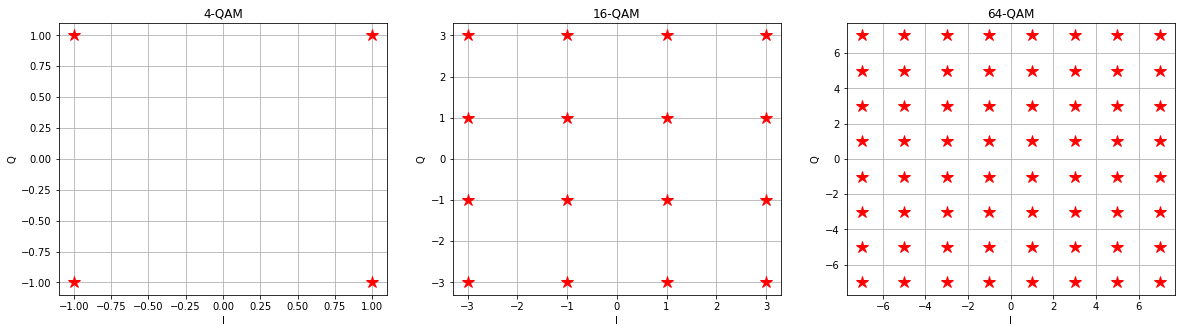

In [2]:
num_symbols = [4,16,64]

plt.figure(figsize=(20,5))
for i,num_simbol in enumerate(num_symbols):
    plt.subplot(1,3,i+1)
    QAM = komm.QAModulation(num_simbol)
    plt.plot(QAM.constellation.real,QAM.constellation.imag, 'r*',markersize=12)
    plt.grid()
    plt.title('{}-QAM'.format(num_simbol))
    plt.xlabel('I')
    plt.ylabel('Q')

### Ejemplo de todos los simbolos posibles que puede tener 16-QAM

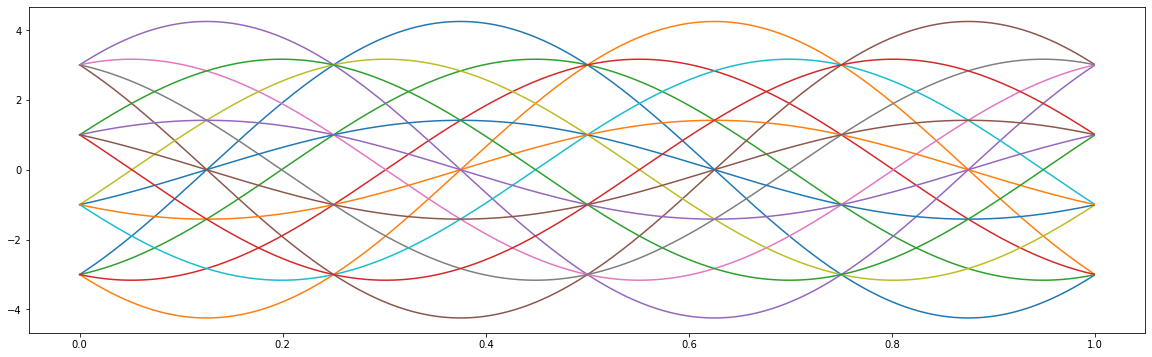

In [3]:
all_bits = combin(4).reshape(1,-1)[0]
QAM_16 = komm.QAModulation(16)

A = QAM_16.modulate(all_bits)

t = np.arange(0,1,1/fs)
x = np.cos(2*np.pi*t*1)
y = np.sin(2*np.pi*t*1)

plt.figure(figsize=(20,6))
for i in A:
    plt.plot(t,i.real*x-i.imag*y)

### Ejemplo de secuencia de bits modulada con 16-QAM

Text(0.5, 1.0, 'Espectro')

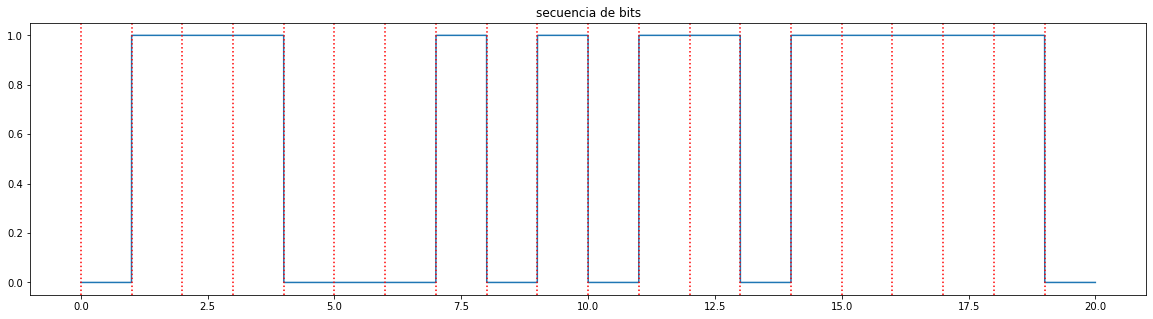

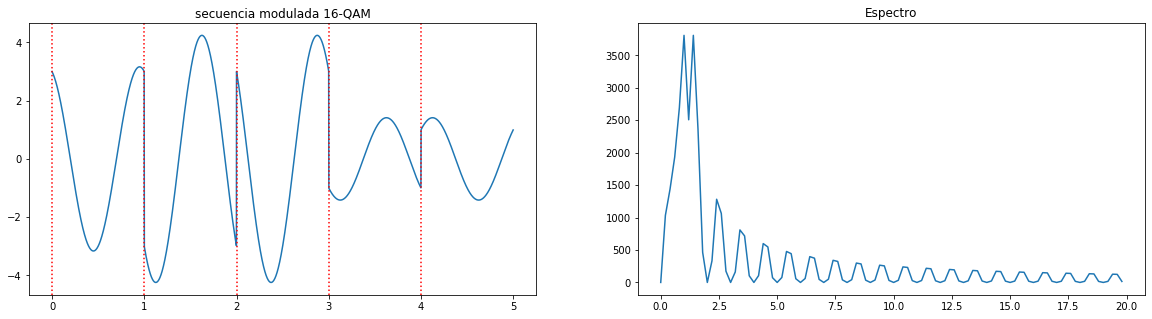

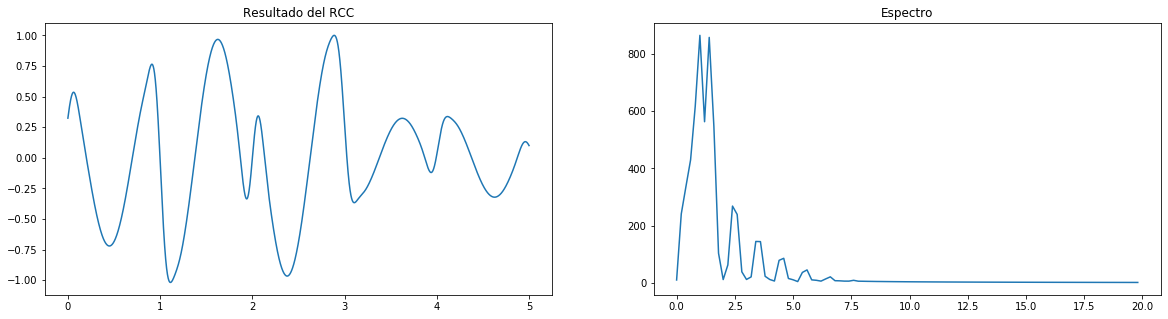

In [4]:
bits = np.random.randint(0,2,20)
tB = 1 #tiempo de bit 
fc = 1 #frecuencia de la portadora 

t,bits_t = x_t(bits,tB,0)
plt.figure(figsize=(20,5))
plt.plot(t,bits_t)
for j in range(len(bits)):
    plt.axvline(j*tB, color='r', ls="dotted")
plt.title('secuencia de bits')
    
    
symbols= QAM_16.modulate(bits)
tS = 1 #timepo de simbolo 
t,xt = x_t(symbols,tS,fc)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(t,xt)
for j in range(len(symbols)):
    plt.axvline(j*tS, color='r', ls="dotted")
plt.title('secuencia modulada 16-QAM')
plt.subplot(1,2,2)
F = np.fft.fft(xt) 
f_ = np.fft.fftfreq(len(F),1/fs)
plt.plot(f_[range(100)],abs(F[range(100)]))
plt.title("Espectro")

span = 0.1
roll_off = 0.5

h = raisedCosinePulse(roll_off,span)*np.cos(2*np.pi*np.arange(-4*span,4*span,1/fs)*fc)
x_send =  np.convolve(xt,h,mode="same")
x_send = x_send/max(x_send)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(t,x_send)
plt.title("Resultado del RCC")
plt.subplot(1,2,2)
F = np.fft.fft(x_send) 
f_ = np.fft.fftfreq(len(F),1/fs)
plt.plot(f_[range(100)],abs(F[range(100)]))
plt.title("Espectro")

## Distacia Hamming 

In [17]:
group_bits= combin(3)
group_bits

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [18]:
def distancia_hamming(group_bits):
    distacias = np.zeros((group_bits.shape[0],group_bits.shape[0]))
    for i,bits_i in enumerate(group_bits): 
        for j,bits_j in enumerate(group_bits):
            distacias[i,j] = np.sum(bits_i!=bits_j)
    return distacias

In [19]:
dist = distancia_hamming(group_bits)
dist

array([[0., 1., 1., 2., 1., 2., 2., 3.],
       [1., 0., 2., 1., 2., 1., 3., 2.],
       [1., 2., 0., 1., 2., 3., 1., 2.],
       [2., 1., 1., 0., 3., 2., 2., 1.],
       [1., 2., 2., 3., 0., 1., 1., 2.],
       [2., 1., 3., 2., 1., 0., 2., 1.],
       [2., 3., 1., 2., 1., 2., 0., 1.],
       [3., 2., 2., 1., 2., 1., 1., 0.]])

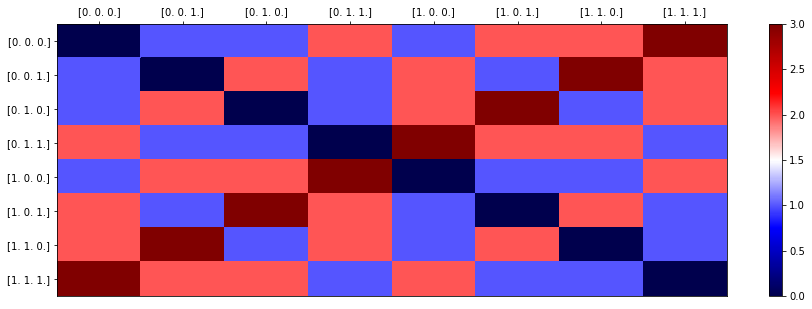

In [21]:
row_labels = list([str(x) for x in group_bits])
column_labels = list([str(x) for x in group_bits])

fig, ax = plt.subplots(figsize=(15,5))

heatmap = ax.pcolor(dist, cmap=plt.cm.seismic)

fig.colorbar(heatmap)

ax.set_xticks(np.arange(dist.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(dist.shape[0])+0.5, minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
plt.show()

### Curva de errores VS SNR

In [ ]:
bits_TX = np.random.randint(0,2,10000) 
SNR = np.arange(0.1,5,0.1)
QAM_16 = komm.QAModulation(16) 

error = []
for i in SNR:
    simbols_TX = QAM_16.modulate(bits_TX)
    canal = komm.AWGNChannel(i)
    simbols_RX = canal(simbols_TX)
    bits_RX = QAM_16.demodulate(simbols_RX)
    error.append(np.sum(bits_RX != bits_TX))

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.stem(SNR,error, use_line_collection = True)
plt.xlabel('SNR')
plt.ylabel('errores')

plt.subplot(1,2,2)
etiquetas = QAM_16.bits_to_symbols(bits_TX)
for i in range(QAM_16.order):
    plt.plot(simbols_RX[etiquetas == i].real,simbols_RX[etiquetas == i].imag,'xk')
plt.plot(QAM_16.constellation.real,QAM_16.constellation.imag, 'r*',markersize=12)
plt.title('Max SNR')
plt.xlabel('I')
plt.ylabel('Q')

## Creación de un esquema de modulación arbitrario 

In [ ]:
int('10',2)

In [ ]:
#bits = np.array([0,0,0,1,1,0,1,1])
bits = np.array([0,0,0,1,1,0,1,1])
mod = komm.ComplexModulation(constellation=[-1j, 1, -1, 0.0], labeling=[1,0,2,3])


simbols_RX = mod.modulate(bits)
etiquetas = mod.bits_to_symbols(bits)
for i in range(mod.order):
    plt.plot(simbols_RX[etiquetas == i].real,simbols_RX[etiquetas == i].imag,'xk',markersize=12)
plt.plot(mod.constellation.real,mod.constellation.imag, 'r*',markersize=5)

mod.bits_to_symbols(bits),simbols_RX

In [ ]:
P = komm.PSKModulation(4)
P.labeling

In [ ]:
help(komm.QAModulation)

## Evaluación 

**Definiciones**
* **Mapeo (mapping)**
* **Codificación y distancia Hamming**
* **Curva de Errores de Bit vs. SNR**


**Simulaciones**
* Diseñe dos formatos de modulación arbitrarios siguiendo la metodología de diseño propuesta (slide 49)
* Calcule la curva de Errores de Bit vs. El SNR como se muestra en la diapositiva 53
* Proponga una codificación que maximice la distancia Hamming (slide 45)